In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd  drive/My Drive/BrewingDataCup/

/content/drive/My Drive/BrewingDataCup


In [ ]:
import pandas as pd

clients_df = pd.read_csv("clients_attributes.csv")
sales_df = pd.read_csv("sales.csv",encoding="iso8859-1")
active_promos_df = pd.read_csv("active_promos.csv")
executed_promos_df = pd.read_csv("executed_promos.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
test_df

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN
...,...,...,...,...
16865,15053,40,16,NaN
16866,15054,40,16,NaN
16867,15056,40,16,NaN
16868,15057,29,9,NaN


In [ ]:
training_data = pd.merge(active_promos_df, clients_df, on='Cliente', how='inner')
training_data


,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422437 entries, 0 to 422436
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CodigoDC          422437 non-null  int64 
 1   Marca             422437 non-null  int64 
 2   Cupo              422437 non-null  int64 
 3   Fecha_Desde       422437 non-null  object
 4   Fecha_Hasta       422437 non-null  object
 5   Cliente           422437 non-null  int64 
 6   FechaAltaCliente  422437 non-null  object
 7   Region            422437 non-null  int64 
 8   Gerencia          422437 non-null  int64 
 9   SubCanal          422437 non-null  int64 
 10  TipoPoblacion     422437 non-null  int64 
 11  Estrato           422437 non-null  int64 
 12  EF                422437 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 45.1+ MB


In [ ]:
executed_promos_df['Exec']=1

In [ ]:
training_data = training_data.merge(executed_promos_df, on=['Cliente','CodigoDC','Marca','Cupo'], how='left')

In [ ]:
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1,NaN
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1,NaN
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1,1.0
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1,NaN
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0,NaN
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0,NaN
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0,NaN
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0,NaN


In [ ]:
5
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1,0.0
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1,0.0
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1,1.0
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1,0.0
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0,0.0
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0,0.0
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0,0.0
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0,0.0


In [ ]:
training_data['Exec'] = training_data.groupby(['Cliente','Marca','Cupo'])['Exec'].transform('mean')


In [ ]:
training_data_trans = training_data[['Cliente','Marca','Cupo','Exec']].drop_duplicates()

In [ ]:
training_data_trans

,Cliente,Marca,Cupo,Exec
0,3213,29,9,0.000000
1,3213,40,16,0.136364
3,3213,39,20,0.000000
48,3795,29,9,0.000000
49,3795,40,16,0.096774
...,...,...,...,...
422432,1927,29,9,0.000000
422433,5928,29,9,0.000000
422434,7179,29,9,0.000000
422435,9293,29,9,0.000000


In [ ]:
training_data_trans.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
test_df_output = test_df.merge(training_data_trans, on=['Cliente','Marca','Cupo'], how='left')

In [ ]:
test_df_output['Ejecuto_Promo']=test_df_output['Exec']

In [ ]:
test_df_output=test_df_output[['Cliente','Marca','Cupo','Ejecuto_Promo']]
test_df_output

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.095238
1,17,29,9,0.000000
2,37,29,9,0.000000
3,46,29,9,0.166667
4,48,29,9,0.000000
...,...,...,...,...
16865,15053,40,16,0.000000
16866,15054,40,16,0.000000
16867,15056,40,16,0.100000
16868,15057,29,9,0.000000


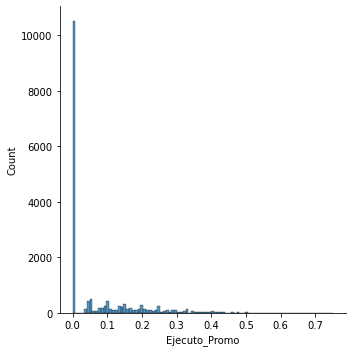

In [ ]:
import seaborn as sns
sns.displot(data=test_df_output, x="Ejecuto_Promo")

In [ ]:
test_df_output.to_csv("output.csv",index=False)

In [ ]:
import lightgbm as lgb
import numpy as np

y = training_data.Exec.values
train.drop(['id', 'target'], inplace=True, axis=1)

In [ ]:


param = {}
bst = lgb.train(param, training_data, num_round, valid_sets=[validation_data])
